### Bibliotecas

In [1]:
%matplotlib notebook

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

### Problema de otimização multi-objetivo


- Vamos considerar um problema de projeto de uma **viga em balanço** com duas variáveis de decisão, diâmetro ($d$) e comprimento ($l$).
- A viga tem que suportar uma carga final $ P $.
- Consideremos também dois objetivos conflitantes de projeto, ou seja, a minimização do peso $f_1$ e a minimização da deflexão final $f_2$.
- O primeiro objetivo recorrerá a uma solução ótima com as menores dimensões de $d$ e $l$, de modo que o peso total da viga seja mínimo.
- Como as dimensões são pequenas, a viga não será adequadamente rígida e a deflexão final da viga será grande.
- Por outro lado, se a viga é minimizada para a deflexão final, espera-se que as dimensões da viga sejam grandes, tornando assim o peso da viga grande.
- Para nossa discussão, consideramos duas restrições:
    1. a tensão máxima desenvolvida $\sigma_{\max}$ é menor que a resistência permitida $S_y$;
    2. a deflexão final $\delta$ é menor que um limite especificado $\delta_{\max }$.
- Com todas as considerações acima, o seguinte problema de otimização de dois objetivos é formulado da seguinte forma:

\begin{aligned}
\min\;&f_1(d, l)=\rho \frac{\pi d^2}{4} l \\
\min\;&f_2(d, l)=\delta=\frac{64 P l^3}{3 E \pi d^4} \\
\text{Sujeito a}\;&\sigma_{\max } \leq S_y, \; \delta \leq \delta_{\max}\\
&10 \leq d \leq 50 \mathrm{~mm}\\
&200 \leq l \leq 1000 \mathrm{~mm}
\end{aligned}

onde a tensão máxima é calculada da seguinte forma:

\begin{equation*}
\sigma_{\max }=\frac{32 P l}{\pi d^3}
\end{equation*}

- Os seguintes valores de parâmetro são usados:

\begin{equation*}
\begin{array}{lll}
\rho=7800 \mathrm{~kg} / \mathrm{m}^3 & P=1 \; \mathrm{kN} & E=207 \; \mathrm{GPa} \\
\mathrm{S}_{y}=300 \; \mathrm{MPa} & \delta_{\max }=5 \mathrm{~mm} &
\end{array}
\end{equation*}

In [2]:
def f1(d, l):
    rho = 7_800.0 # kg/m3
    return rho * np.pi * d**2 * l / 4.0

def f2(d, l):
    P = 1.0 # kN
    E = 207_000_000.0 # kPa
    return (64.0 * P * l**3.0) / (3.0 * E * np.pi * d**4.0)

### Plotando os espaços

<IPython.core.display.Javascript object>


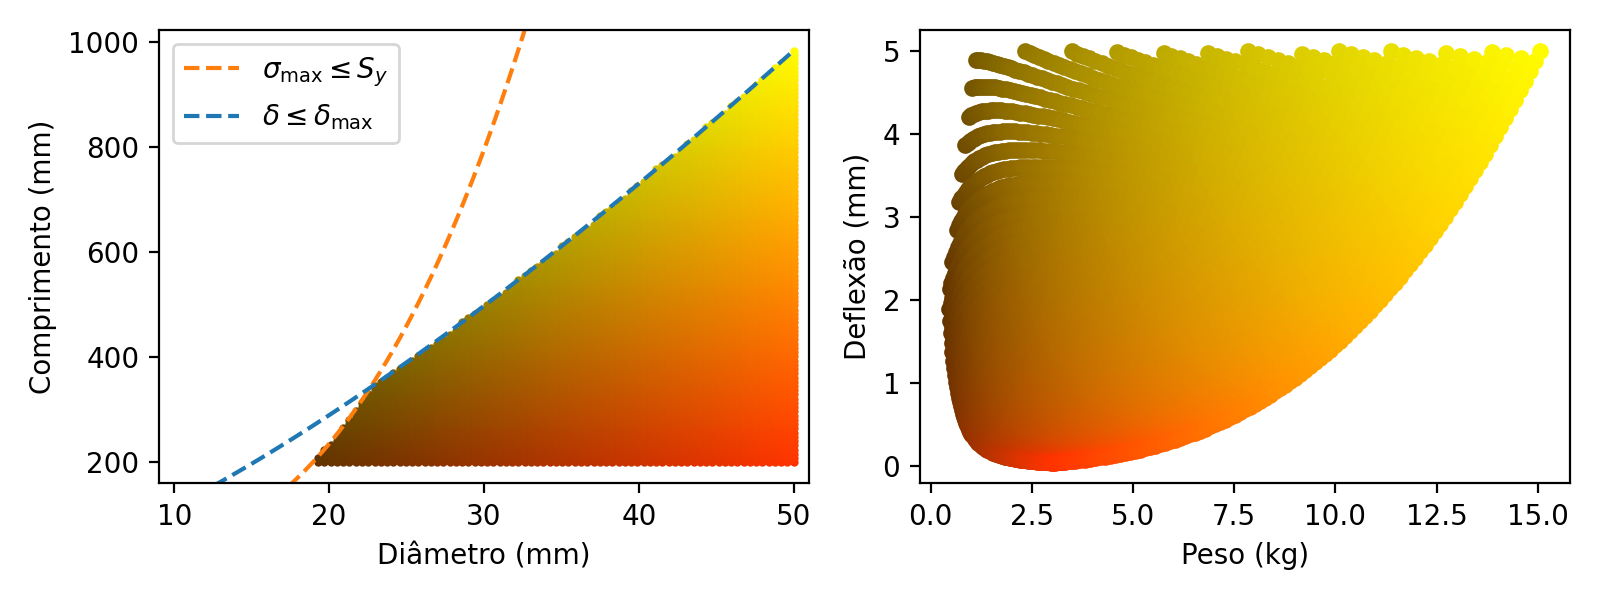

In [3]:
Sy = 300_000.0 # kPa
delta_max = 0.005 # m

def sigma_max(d, l):
    P = 1.0
    return (32.0 * P * l) / (np.pi * d**3.0)

def sigma_max_explicito(d):
    P = 1.0
    Sy = 300_000.0
    
    return np.pi * d**3.0 * Sy / (32.0 * P)

def f2_explicito(d):
    P = 1.0
    E = 207_000_000.0
    delta_max = 0.005
    
    return (3.0 * E * np.pi * d**4.0 * delta_max / (64.0 * P))**(1.0/3.0)

# Criando a figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

vd = np.linspace(0.01, 0.05, 100) # m
vl = np.linspace(0.2, 1.0, 100) # m

for d in vd:
    for l in vl:
        if sigma_max(d, l) <= Sy and f2(d, l) <= delta_max:
            ax[0].plot(d * 1_000.0, l * 1_000.0, "o", markersize=2, color=(d/vd[-1], l/vl[-1], 0.0))
            ax[1].plot(f1(d, l), f2(d, l) * 1_000.0, "o", markersize=5, color=(d/vd[-1], l/vl[-1], 0.0))
ax[0].plot(vd * 1_000.0, sigma_max_explicito(vd) * 1_000.0, "--", color="C1", label=r"$\sigma_{\max } \leq S_y$")
ax[0].plot(vd * 1_000.0, f2_explicito(vd) * 1_000.0, "--", color="C0", label=r"$\delta \leq \delta_{\max}$")
            
ax[0].set_xlim([9.0, 51.0])
ax[0].set_ylim([160.0, 1_023.0])

ax[0].set_xlabel("Diâmetro (mm)")
ax[0].set_ylabel("Comprimento (mm)")

ax[1].set_xlabel("Peso (kg)")
ax[1].set_ylabel("Deflexão (mm)")

ax[0].legend()

fig.tight_layout()